In [14]:
import gensim 
from os import walk

file_list = []
current_path = "./aclImdb/test/neg/"
for (dirpath, dirnames, filenames) in walk(current_path):
    file_list.extend(filenames)
    break

def read_input(current_path, file_list):
    for i in range(len(file_list)):
        with open(current_path + file_list[i],encoding = 'utf-8') as file:
            for j, line in enumerate(file):
                yield gensim.utils.simple_preprocess(line)

document = list(read_input(current_path, file_list))

model_neg = gensim.models.Word2Vec (document, size=50, window=20, min_count=5, workers=4)
model_neg.train(document, total_examples=len(document), epochs=50)

(101848674, 137700150)

In [78]:
model_neg.wv.most_similar(positive=['movie'], topn=6)

[('film', 0.777409017086029),
 ('it', 0.7070064544677734),
 ('flick', 0.590258002281189),
 ('thing', 0.5889033079147339),
 ('really', 0.5518568158149719),
 ('just', 0.5492559671401978)]

In [28]:
print(model_neg.wv['the'])

[-0.5855621   0.49987897 -1.5791336   2.0429811   1.2101834   0.46544996
  0.8707211   0.59099835  0.5678716  -1.3921062   0.55371004  0.12179638
 -0.9176705   0.50375825 -2.6306534  -0.71586245 -0.9616701   1.0122671
 -0.72643733 -0.8433222   1.3099725  -1.5237241   1.0810645   1.8983781
  2.117783   -0.31258407  1.0186772  -0.6493535   0.72003275  0.6269483
 -0.9616815  -0.8309528   2.1427083   0.642651    0.87293506  0.3292972
  0.2597277   0.6015543   2.6434839   1.2089481   0.88730586  0.4765443
  0.2920038  -1.5827514  -1.0795015  -1.9132379  -0.8981855  -1.1813793
  1.9509311  -0.07560846]


In [29]:
import gensim 
from os import walk

file_list = []
current_path = "./aclImdb/test/pos/"
for (dirpath, dirnames, filenames) in walk(current_path):
    file_list.extend(filenames)
    break

def read_input(current_path, file_list):
    for i in range(len(file_list)):
        with open(current_path + file_list[i],encoding = 'utf-8') as file:
            for j, line in enumerate(file):
                yield gensim.utils.simple_preprocess(line)

document = list(read_input(current_path, file_list))

model_pos = gensim.models.Word2Vec (document, size=50, window=10, min_count=5, workers=4)
model_pos.train(document, total_examples=len(document), epochs=100)

(205085750, 276927000)

In [82]:
model_pos.wv.most_similar(positive=['movie'], topn=6)

[('film', 0.8722399473190308),
 ('it', 0.7302216291427612),
 ('flick', 0.7182259559631348),
 ('story', 0.6133499145507812),
 ('thing', 0.5861601829528809),
 ('documentary', 0.5845786333084106)]

In [33]:
model_pos.wv.most_common(topn=6)

AttributeError: 'Word2VecKeyedVectors' object has no attribute 'most_common'

# T-SNE 활용 (model_neg)

In [40]:
keys = ['funny','dull']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model_neg.wv.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model_neg.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [41]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

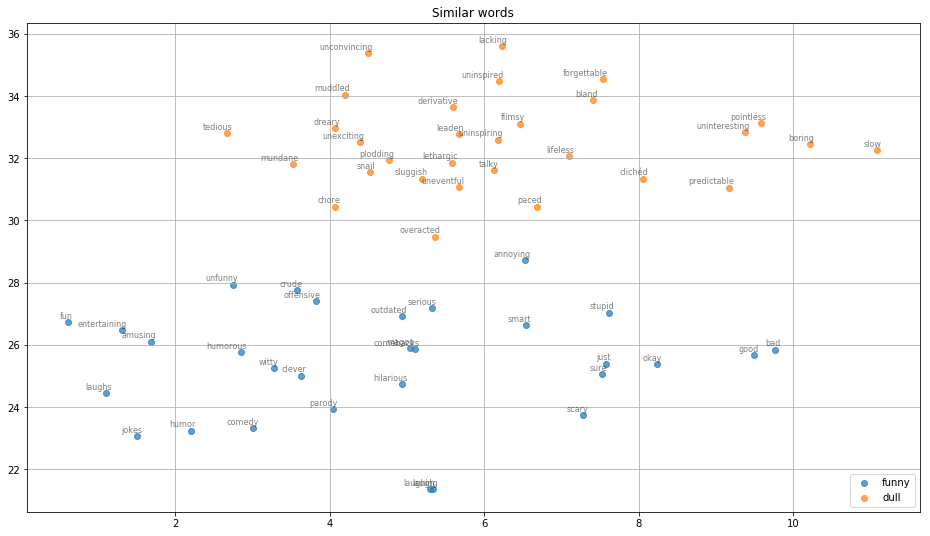

In [42]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, alpha = a, label = label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=300, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

# T-SNE 활용 (model_pos)

In [30]:
keys = ['funny','uninteresting']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model_pos.wv.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model_pos.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [31]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

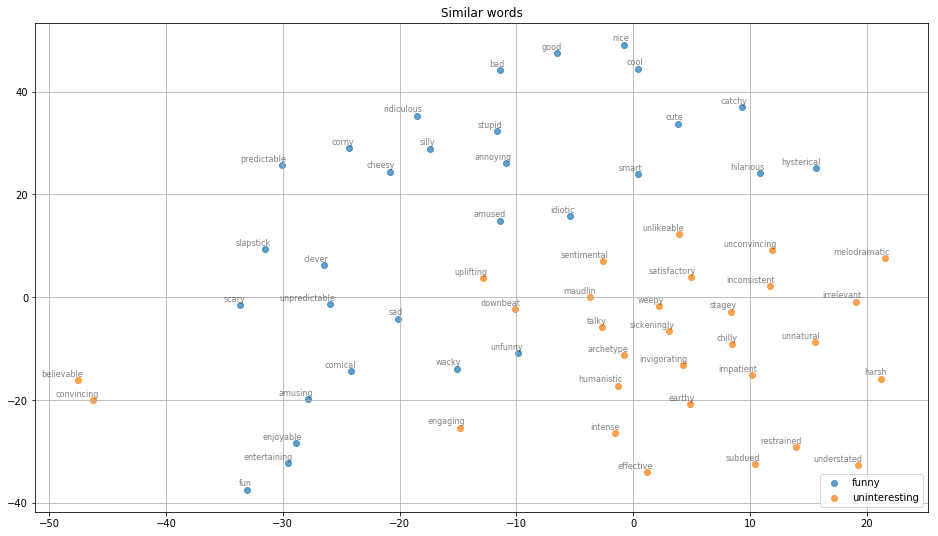

In [32]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, alpha = a, label = label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=300, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

# 글자 빈도수

In [104]:
count = []
set_words = []
for word, obj in model_neg.wv.vocab.items():
    set_words.append(word)
    count.append(obj.count)
for _ in range(1000):
    idx = count.index(max(count))
    print(set_words[idx], max(count))
    del count[idx]
    del set_words[idx]


the 163308
and 73415
of 68296
to 67828
br 51361
is 49167
it 47331
in 43776
this 40432
that 36646
was 25978
movie 25148
for 21307
but 21037
with 20770
as 20018
film 18376
you 18041
on 17117
not 16087
have 15468
are 14527
be 14282
he 13231
one 13145
they 12884
at 12132
all 11776
his 11676
so 11306
like 11217
there 10532
just 10455
an 10240
by 10190
or 10084
from 9846
if 9761
who 9655
out 9009
about 8735
what 8541
some 8353
no 7916
even 7563
has 7455
can 7441
her 7408
bad 7325
good 7305
would 6971
up 6904
when 6771
only 6595
more 6549
she 6209
time 6147
really 6092
my 5986
had 5860
were 5816
very 5796
me 5659
which 5581
see 5301
don 5259
their 5210
do 5198
get 5096
we 5062
much 5040
been 5009
story 4976
than 4974
because 4768
people 4662
how 4646
make 4633
could 4615
then 4558
into 4508
any 4469
other 4383
well 4283
made 4260
movies 4232
them 4189
too 4084
plot 4059
first 4046
acting 4031
him 3924
most 3895
will 3845
way 3791
characters 3753
after 3686
watch 3670
off 3642
also 3576
did 35

country 365
attempts 364
reading 364
french 364
perfect 364
result 363
ed 363
pay 363
quickly 361
incredibly 360
important 360
relationship 359
means 359
documentary 358
figure 357
excellent 357
working 357
free 357
parents 356
expected 355
message 354
james 354
subject 354
zombie 354
miss 353
hear 353
british 351
bring 351
project 350
future 348
party 347
loved 345
potential 345
happy 343
events 343
reasons 343
deal 341
th 341
front 340
screenplay 340
store 339
eye 339
comment 339
barely 338
ended 338
plus 338
ask 337
list 337
finds 337
lady 337
red 336
third 336
development 336
easily 336
modern 335
laughs 334
shoot 333
rock 333
neither 332
air 332
enjoyed 330
value 330
feels 330
typical 330
doctor 330
king 330
hands 329
acted 329
apart 329
remake 328
mystery 328
forget 328
soundtrack 328
boys 327
failed 327
hilarious 327
sadly 326
missing 326
follow 326
rate 325
viewers 325
laughing 325
similar 325
today 324
effect 324
producers 324
fairly 324
general 324
appear 323
surprise 321
dis